**Prueba practica**

Generar gráficas para entender y procesar los datos:
* Generar gráfico de barras de solo las empresas que han mejorado y/o empeorado su ranking con respecto al año anterior.
* Generar gráfico de las empresas que tienen panamá papers.
* Generar un pie de las empresas que más aportan a la economía del país.
* Obtener las empresas que mayor patrimonio tienen (10).

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go

In [29]:
#Trabajar con otro tipo de datos Fifa
fifa = pd.read_excel('/Libro1.xlsx')
#imprimir los primeros 5 datos del archivo
fifa.head(5)

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1.0,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2.0,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
2,3.0,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
3,4.0,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5.0,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN


In [89]:
igual0 = fifa.loc[fifa['Variación Ranking Tamaño 2020 - 2021'] == 0].count()[0]
may1 = fifa.loc[fifa['Variación Ranking Tamaño 2020 - 2021'] >= 1].count()[0]
min1 = fifa.loc[fifa['Variación Ranking Tamaño 2020 - 2021'] <= 0].count()[0]
igual0
may1
min1

138

In [93]:
general = fifa.loc[:,"Variación Ranking Tamaño 2020 - 2021"]
igual = []
mejora = []
peor = []

for i in general:
    if i >= 1:
      mejora.append(i) 
    if i <= 0:
      peor.append(i) 

len(peor)

138

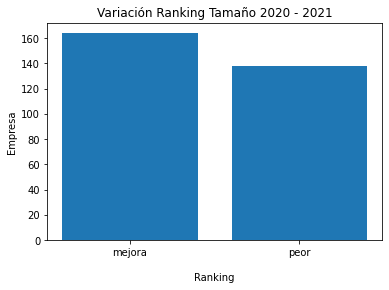

In [96]:
vec=["mejora", "peor"]
m=len(mejora)
p=len(peor)
valores=[len(mejora),len(peor)]
plt.bar(vec, valores)
plt.ylabel('Empresa')
plt.xlabel('\nRanking')
## Título de Gráfica
plt.title('Variación Ranking Tamaño 2020 - 2021')
## Mostramos Gráfica
plt.show() 



In [97]:
papercont = fifa.loc[fifa['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'] >= 1].count()[0] 
papers = fifa.loc[:,"No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)"]
tiene = []

for i in papers:
    if i >= 1:
     tiene.append(i) 




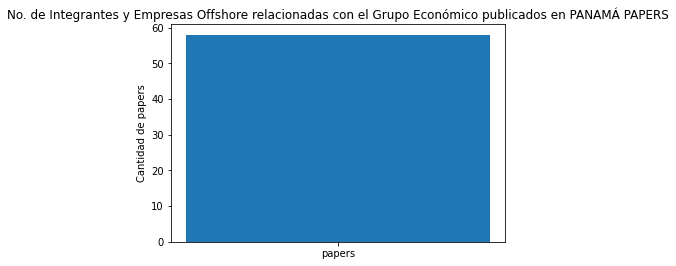

In [100]:
content=["papers"]
plt.bar(content, papercont)
plt.ylabel('Cantidad de papers')
## Título de Gráfica
plt.title("No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS")
## Mostramos Gráfica
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


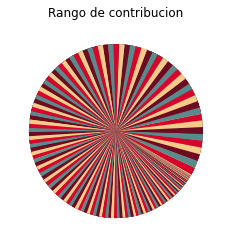

In [111]:
dato = fifa.sort_values(["Contribución   I.R. 2020"], ascending=False)
sorter = dato["Contribución   I.R. 2020"]
grupo = dato["\nNombre Grupo Económico"]
sorter[1:11]
etiquetas = ['<125lbs.', '>175lbs', '125lbs - 150lbs', '150lbs - 175lbs']
colores = ['#6B0C22', '#F4CB89', '#D9042B', '#588C8C']
plt.pie([sorter], colors=colores)
plt.title('Rango de contribucion')
plt.show()

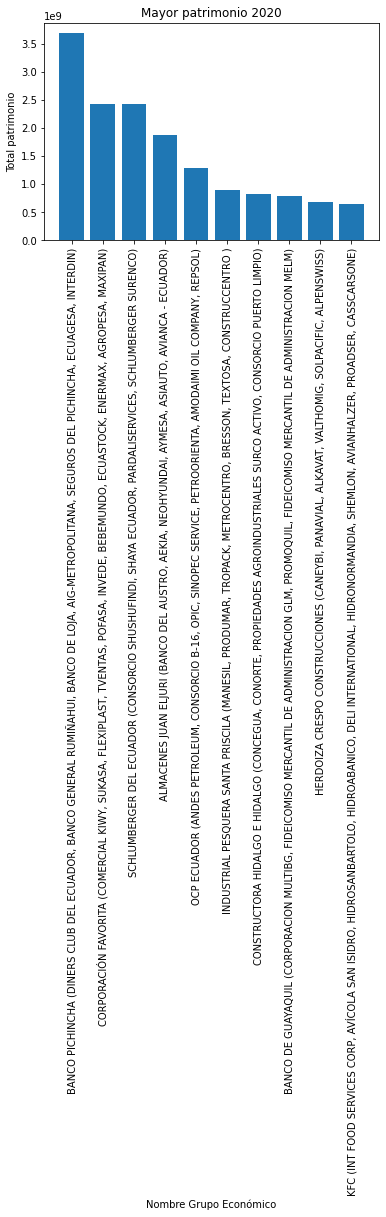

In [116]:
dato1 = fifa.sort_values(["Total Patrimonio (7) 2020"], ascending=False)
sorter = dato1["Total Patrimonio (7) 2020"]
grupo = dato1["\nNombre Grupo Económico"]
top10 = [sorter[1:11], grupo[1:11]]

plt.bar(grupo[1:11], sorter[1:11])
plt.xticks(rotation=90)
## Legenda en el eje y
plt.xlabel('Nombre Grupo Económico')
## Legenda en el eje y
plt.ylabel('Total patrimonio')
## Título de Gráfica
plt.title('Mayor patrimonio 2020')
## Mostramos Gráfica
plt.show() 

**Conclusion**
Se puede observar como con los resultados obtenidos existe una mejora en su ranking en el años 2021, pero de igual forma existen mayor casos de empresas invloucradas cin el caso de panama papers. Como punto final se observa que el banco del pichincha es la empresa con mayor patrimonio nacional.